# Calculation of the "Daily estimated MUR SST v4.1 Frontal edges, x_gradient, y_gradient and gradient magnitude, US Atlantic Coast, 2003-present" dataset

This notebook documents the calculation MUR 1-km SST frontal edges using the Canny Edge Detection Algorithm. 

The basic steps taken are the following:

1. Extract the MUR SST data for the given day and region
2. Pass the data array to a Python scikit-image Canny Edge Detection function
3. Pass the  edges from step 2 to the OpenCV findContours()  algorithm to see if some of the edges should be connected
4. Toss out any edges less than a given number of pixels.

The Python scikit-image Canny algortihm was chosen because of all the Python and R implementations it was the only one that allowed masking of the input array.  All of the others did not,  so they spent a lot of time defining the edges of continental North America,  and the value given to the land affected the distribution of the gradients.

The Python code used in the notebook, including plotting routines,  is at the end of the notebook.

The first step is to import all the needed packages.  "Canny2"  and "canny_lib"  are defined at the bottom.

In [4]:
from Canny2 import *
from canny_lib import *
from cartopy import crs
import cmocean
import cv2
import numpy as np
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np
import numpy.ma as ma
from skimage.feature import canny
import xarray as xr



## Testing the algorithm

We will look at the results for 3 days,  January 15, 2023,  May 1 2023 and October 15 2023.  When looking at the gradients,  the plot on the right look at the distribution in related to the lower and upper values.  They should be set to capture right where the cumulative distribution stops increasing sharply.  For the edges,  the right graph shows the histogram of the length of the edges.  The idea is to remove the really small edges while maintaining a reasonable description of the fronts.

### January 15, 2023

First extract the SST data for that date for the desired region and calculate the gradients and the edges.x

In [6]:
mur_file_name = '20230115090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc'
# extract data from MUR file
sst_mur, lon_mur, lat_mur = extract_mur(mur_file_name)
# create front netcdf file to be written to
#front_file = create_canny_nc(file_year, file_month, file_day)
#need to do two calls because of change
edges, x_gradient, y_gradient, magnitude = myCanny(sst_mur, ~sst_mur.mask)
contours = my_contours(edges)
contour_edges, contour_lens = contours_to_edges(contours, edges.shape)
contour_edges = ma.array(contour_edges, mask = sst_mur.mask)


Plotting the x-gradient for January

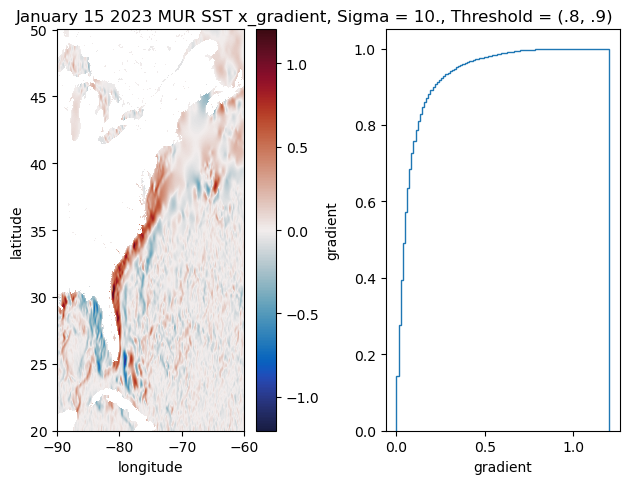

In [7]:
my_title = 'January 15 2023 MUR SST x_gradient, Sigma = 10., Threshold = (.8, .9)'
plot_canny_gradient(x_gradient, contour_edges, lat_mur, lon_mur, title = my_title, fig_size = ([12, 6]) )


The y-gradient for January:

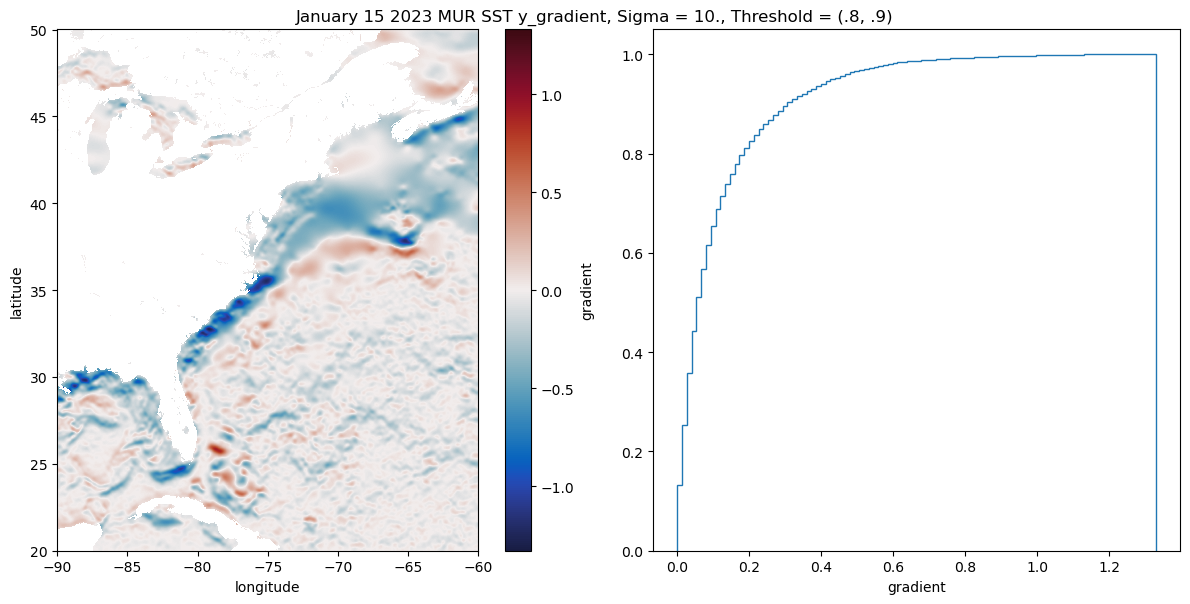

In [9]:
my_title = 'January 15 2023 MUR SST y_gradient, Sigma = 10., Threshold = (.8, .9)'
plot_canny_gradient(y_gradient, contour_edges, lat_mur, lon_mur, title = my_title, fig_size = ([12, 6]) )


The magnitude of the gradient for January:

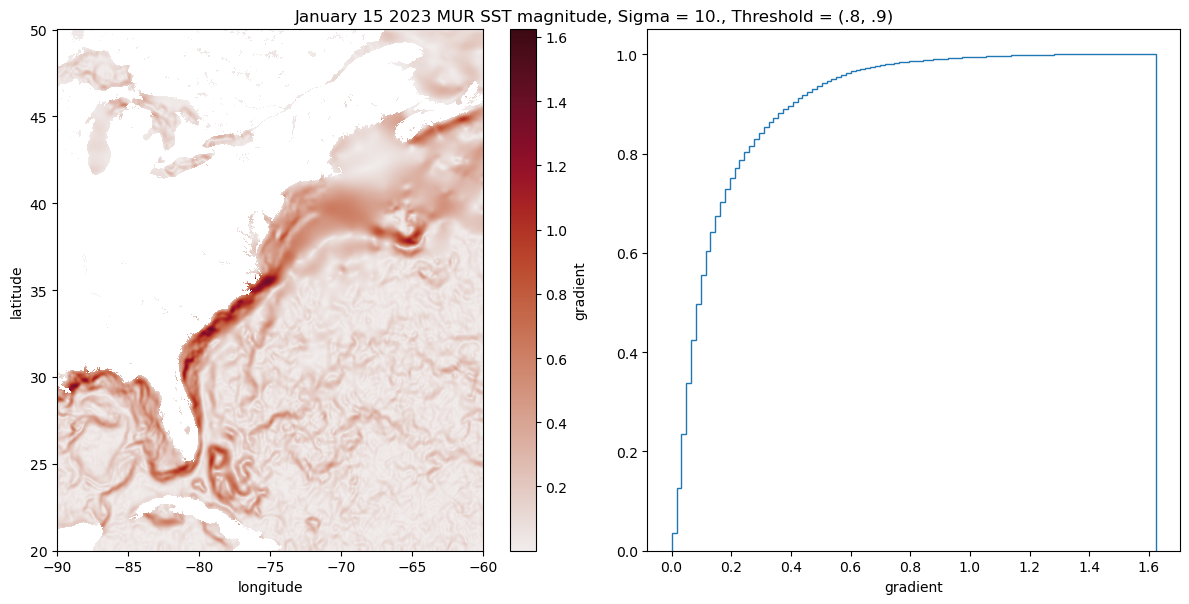

In [10]:
my_title = 'January 15 2023 MUR SST magnitude, Sigma = 10., Threshold = (.8, .9)'
plot_canny_gradient(magnitude, contour_edges, lat_mur, lon_mur, title = my_title, fig_size = ([12, 6]) )


The estimated fronts and SST for January:

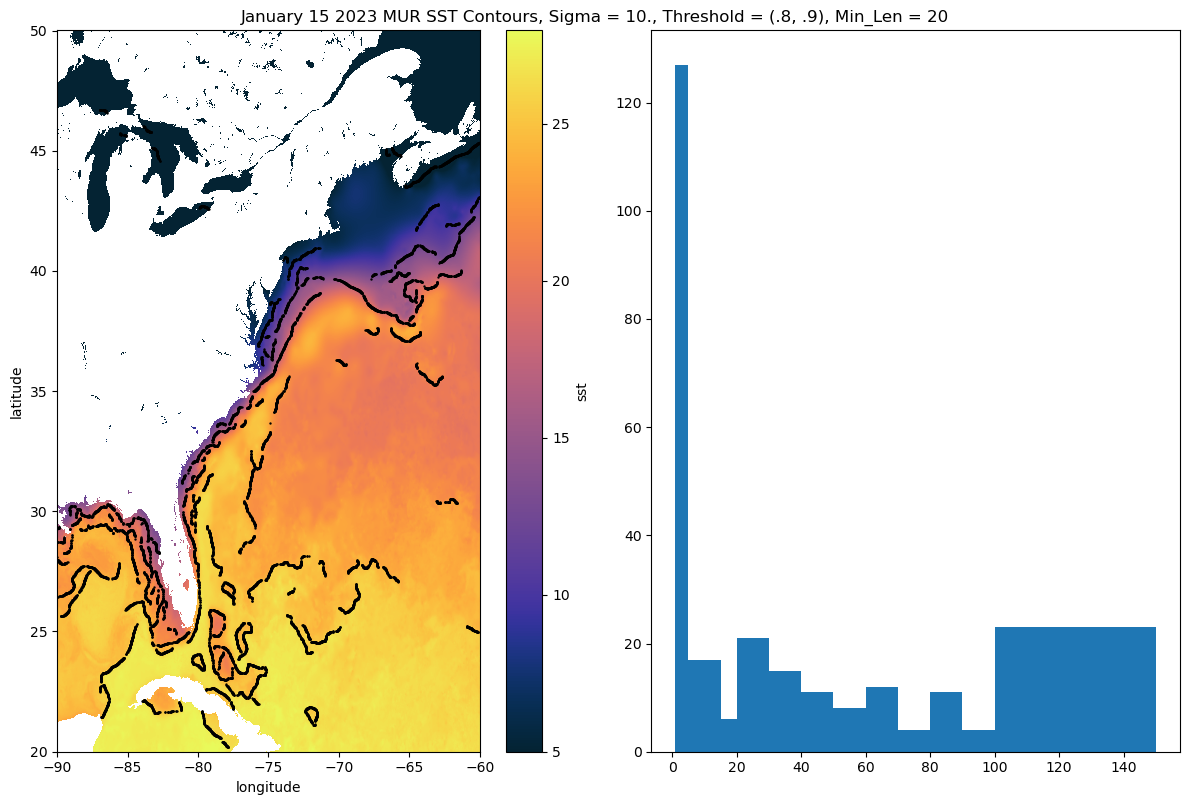

In [11]:
my_title = 'January 15 2023 MUR SST Contours, Sigma = 10., Threshold = (.8, .9), Min_Len = 20'
plot_canny_contours3(sst_mur, contour_edges, contour_lens, lat_mur, lon_mur, title = my_title, fig_size = ([12, 8]))


### Results for May 1 2023
    
Extract the data can calculate gradients and edges.

In [12]:
mur_file_name = '20230501090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc'
# extract data from MUR file
sst_mur, lon_mur, lat_mur = extract_mur(mur_file_name)
# create front netcdf file to be written to
#front_file = create_canny_nc(file_year, file_month, file_day)
#need to do two calls because of change
edges, x_gradient, y_gradient, magnitude = myCanny(sst_mur, ~sst_mur.mask)
contours = my_contours(edges)
contour_edges, contour_lens = contours_to_edges(contours, edges.shape)
contour_edges = ma.array(contour_edges, mask = sst_mur.mask)


x-gradient for May:

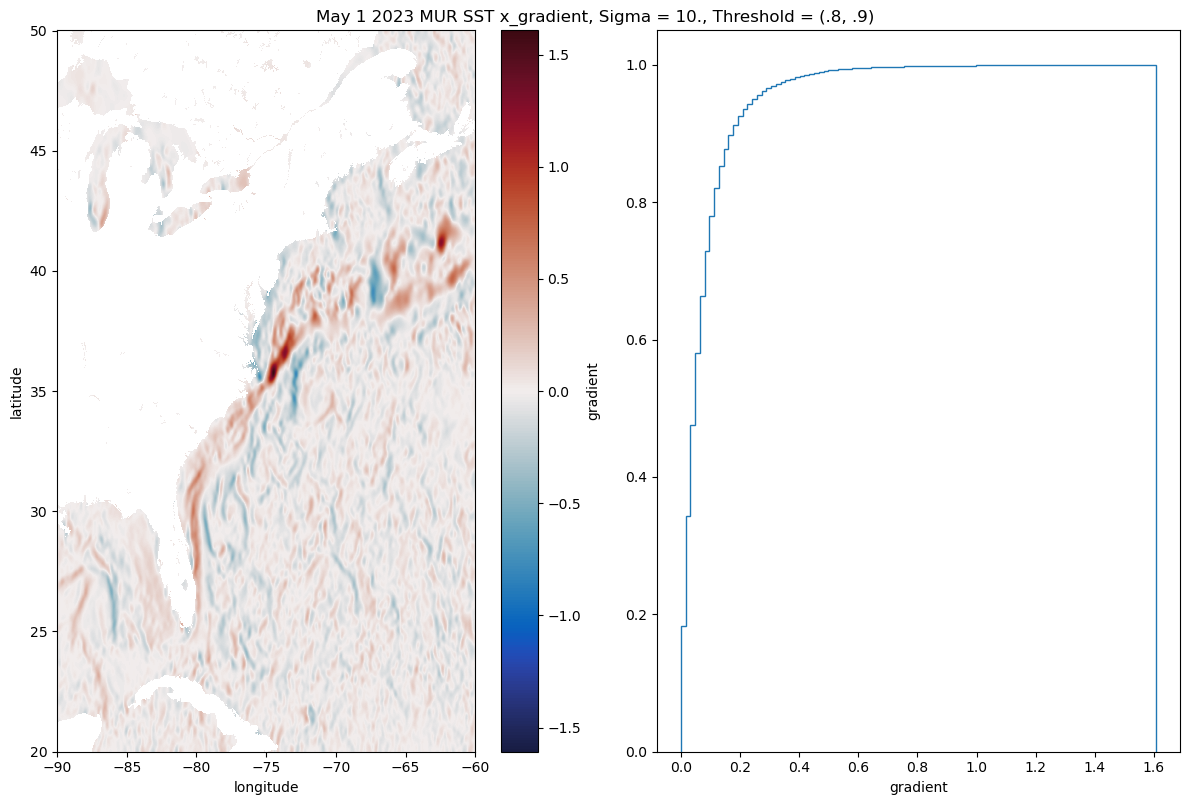

In [13]:
my_title = 'May 1 2023 MUR SST x_gradient, Sigma = 10., Threshold = (.8, .9)'
plot_canny_gradient(x_gradient, contour_edges, lat_mur, lon_mur, title = my_title, fig_size = ([12, 6]) )


y-gradient for May:

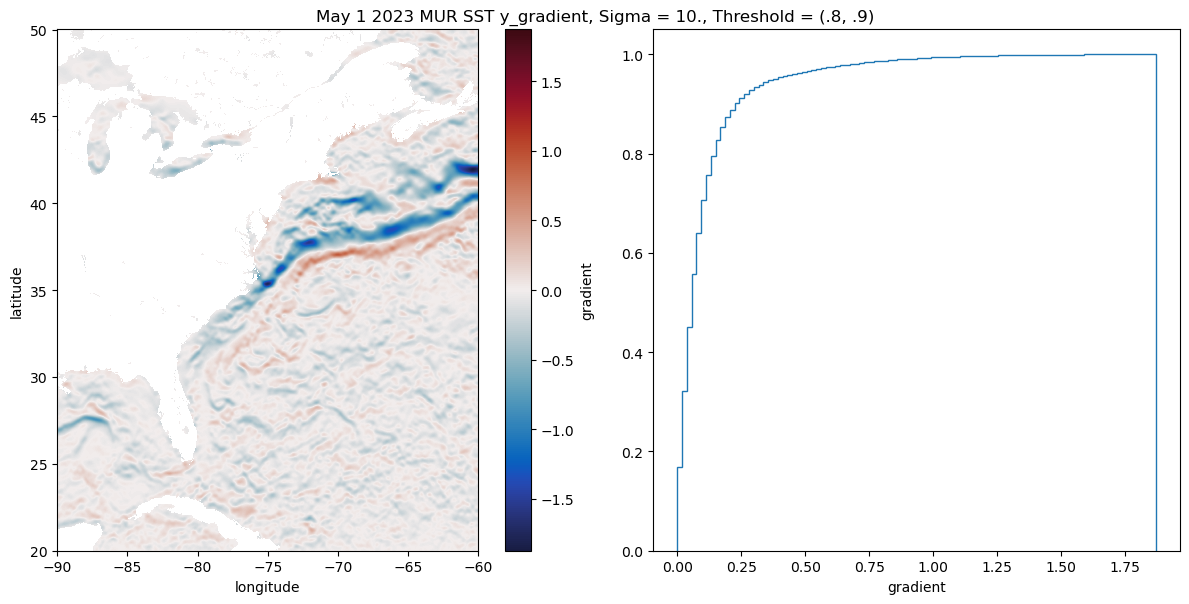

In [14]:
my_title = 'May 1 2023 MUR SST y_gradient, Sigma = 10., Threshold = (.8, .9)'
plot_canny_gradient(y_gradient, contour_edges, lat_mur, lon_mur, title = my_title, fig_size = ([12, 6]) )


magnitude of gradient for May:

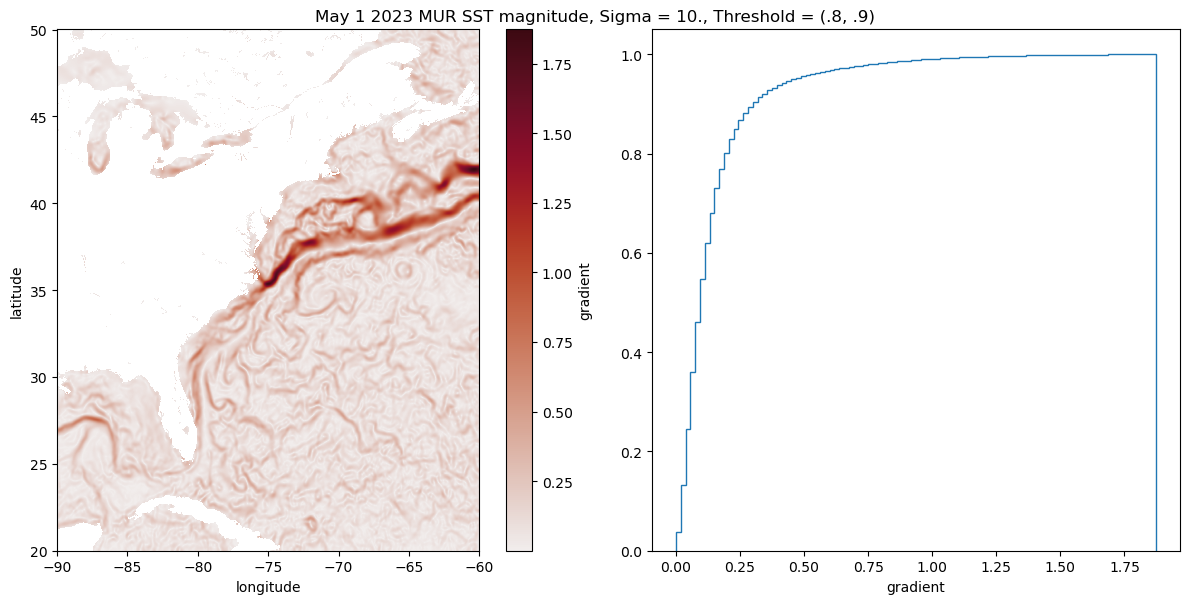

In [15]:
my_title = 'May 1 2023 MUR SST magnitude, Sigma = 10., Threshold = (.8, .9)'
plot_canny_gradient(magnitude, contour_edges, lat_mur, lon_mur, title = my_title, fig_size = ([12, 6]) )


Estimated fronts and SST for May:

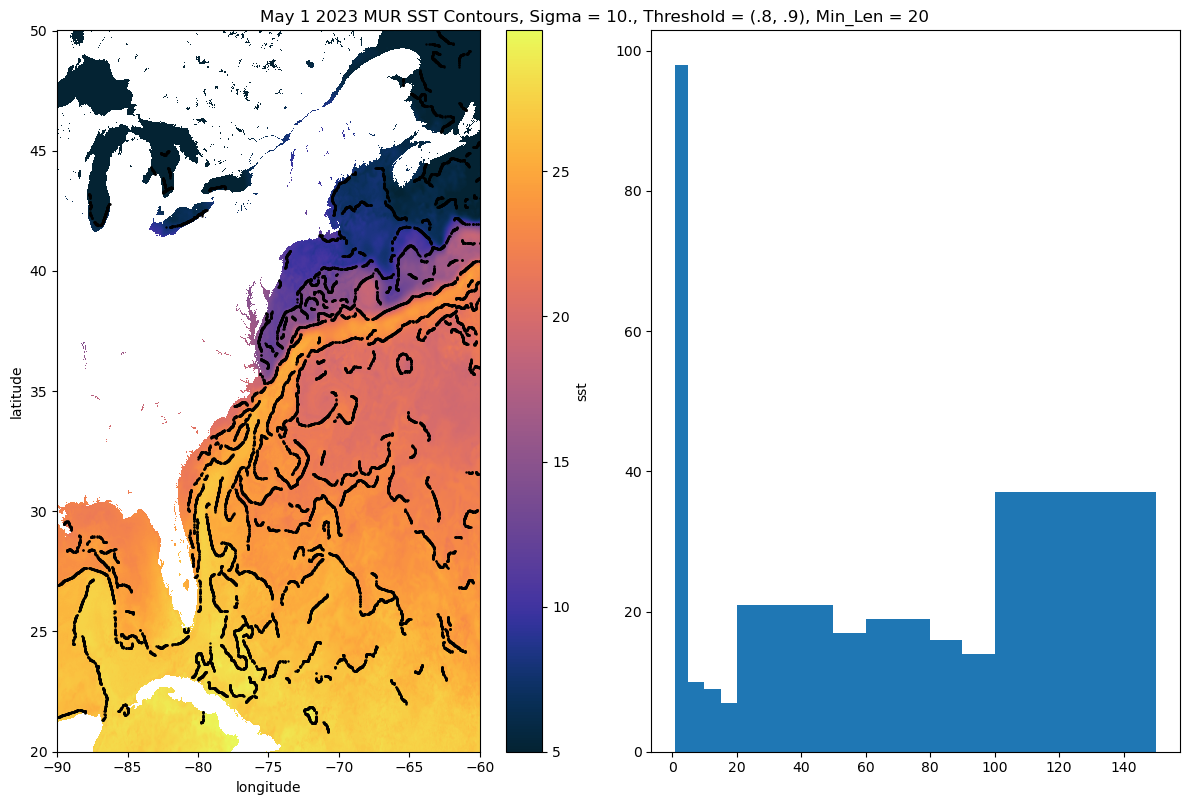

In [16]:
my_title = 'May 1 2023 MUR SST Contours, Sigma = 10., Threshold = (.8, .9), Min_Len = 20'
plot_canny_contours3(sst_mur, contour_edges, contour_lens, lat_mur, lon_mur, title = my_title, fig_size = ([12, 8]))


### Results for October 15 2023
    
Extract the data can calculate gradients and edges.

In [17]:
mur_file_name = '20231015090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc'
# extract data from MUR file
sst_mur, lon_mur, lat_mur = extract_mur(mur_file_name)
# create front netcdf file to be written to
#front_file = create_canny_nc(file_year, file_month, file_day)
#need to do two calls because of change
edges, x_gradient, y_gradient, magnitude = myCanny(sst_mur, ~sst_mur.mask)
contours = my_contours(edges)
contour_edges, contour_lens = contours_to_edges(contours, edges.shape)
contour_edges = ma.array(contour_edges, mask = sst_mur.mask)


x-gradient for October:

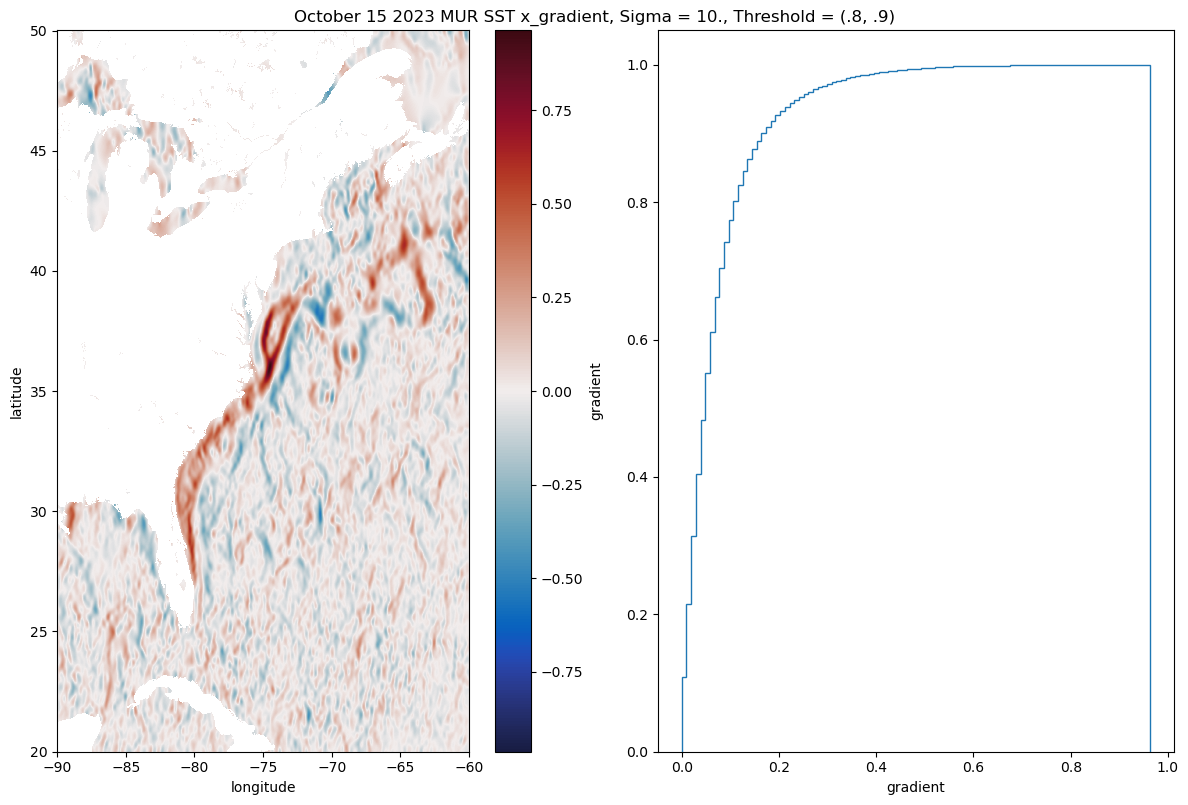

In [18]:
my_title = 'October 15 2023 MUR SST x_gradient, Sigma = 10., Threshold = (.8, .9)'
plot_canny_gradient(x_gradient, contour_edges, lat_mur, lon_mur, title = my_title, fig_size = ([12, 6]) )


y-gradient for October:

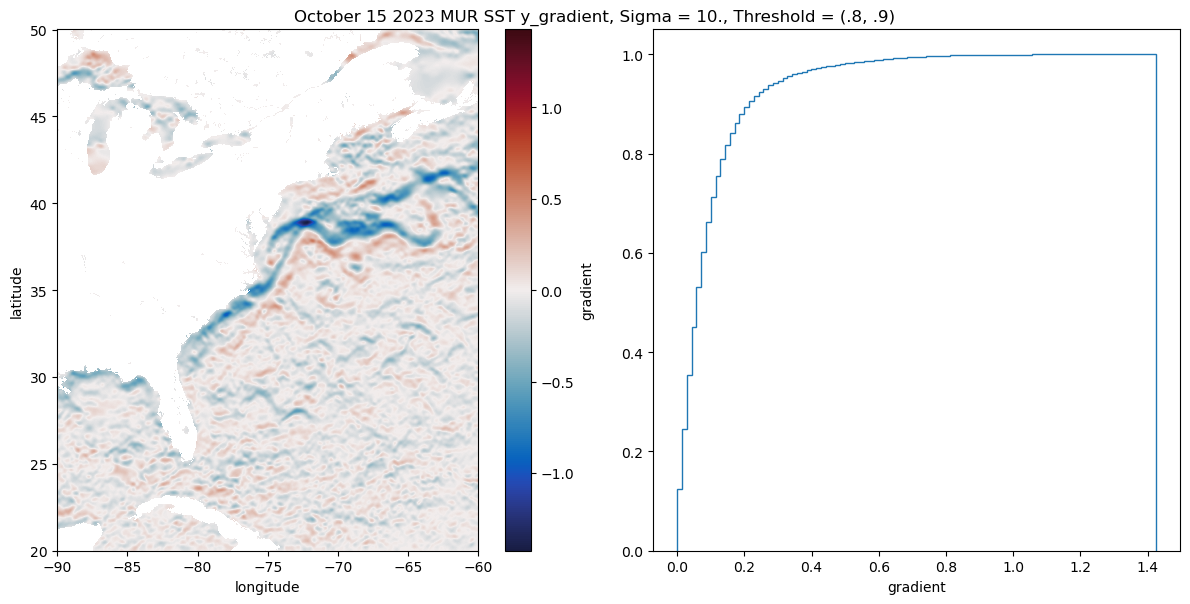

In [19]:
my_title = 'October 15 2023 MUR SST y_gradient, Sigma = 10., Threshold = (.8, .9)'
plot_canny_gradient(y_gradient, contour_edges, lat_mur, lon_mur, title = my_title, fig_size = ([12, 6]) )


magnitude of gradient for October:

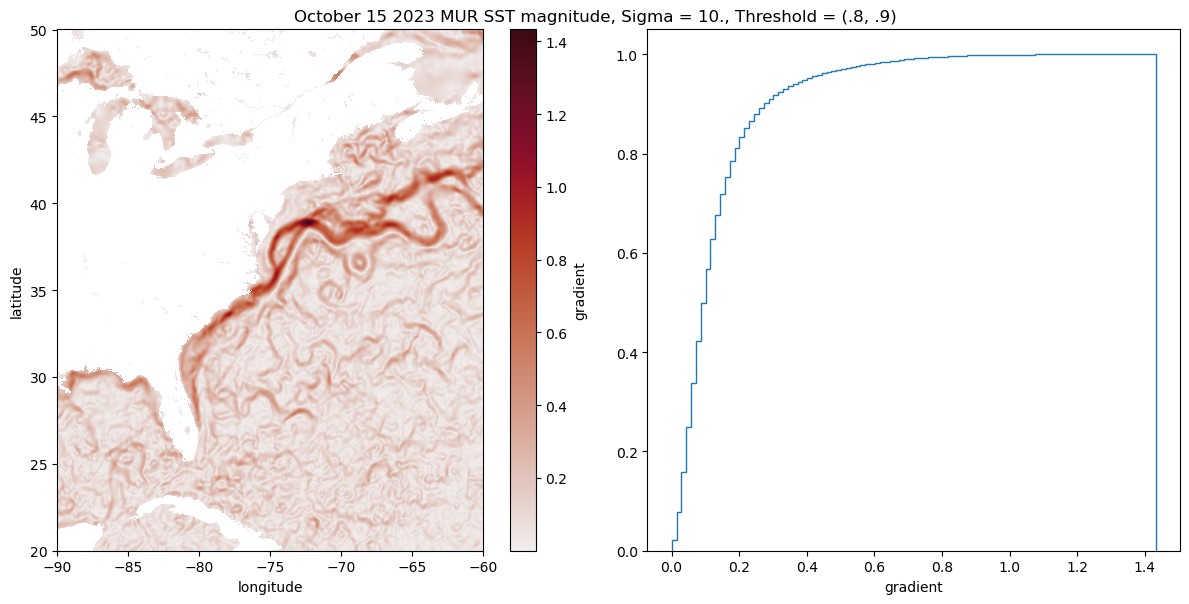

In [20]:
my_title = 'October 15 2023 MUR SST magnitude, Sigma = 10., Threshold = (.8, .9)'
plot_canny_gradient(magnitude, contour_edges, lat_mur, lon_mur, title = my_title, fig_size = ([12, 6]) )


estimated fronts and SST for October:

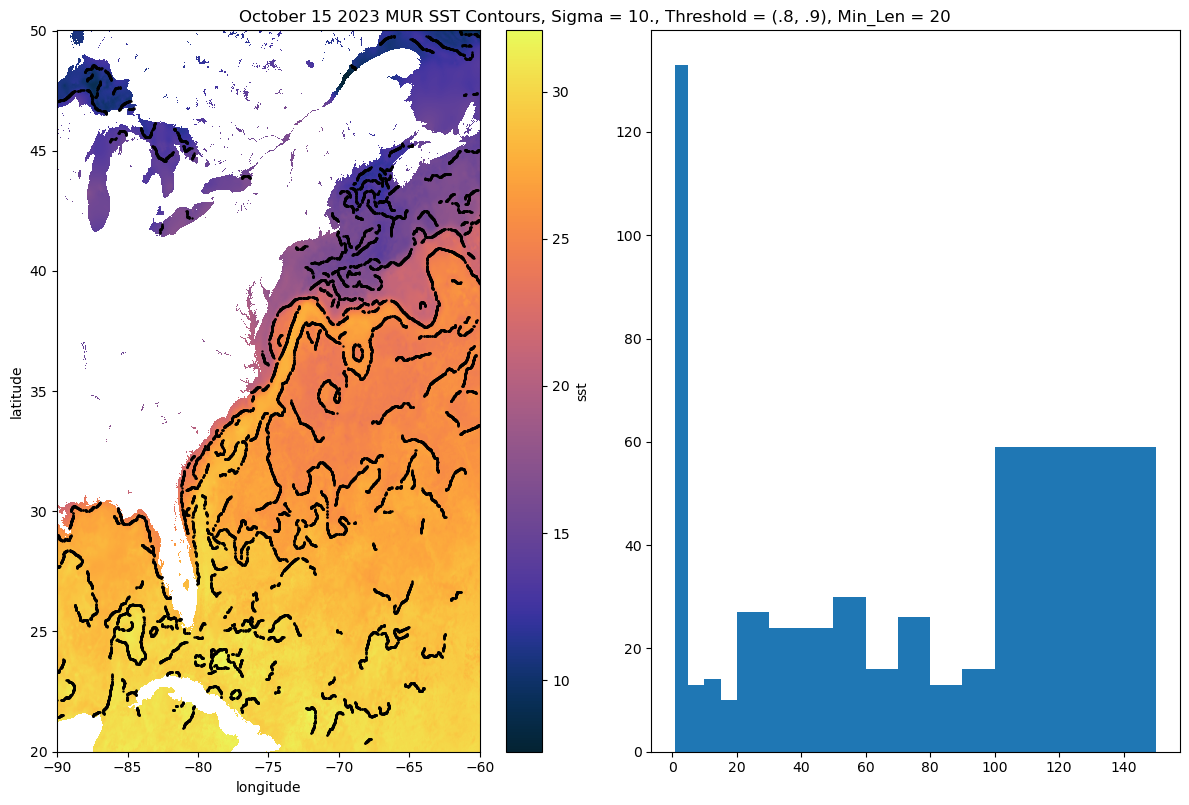

In [21]:
my_title = 'October 15 2023 MUR SST Contours, Sigma = 10., Threshold = (.8, .9), Min_Len = 20'
plot_canny_contours3(sst_mur, contour_edges, contour_lens, lat_mur, lon_mur, title = my_title, fig_size = ([12, 8]))


## canny_lib.py

In [1]:
import cmocean
from Canny2 import *
import cv2
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset
import numpy as np
import numpy.ma as ma
from skimage.feature import canny
import xarray as xr

def isleap(year):
    from datetime import date, datetime, timedelta
    try:
        date(year,2,29)
        return True
    except ValueError: return False


def extract_mur(file_name, file_base = '/Users/rmendels/Workfiles/fronts/fronts_atlantic/',  lat_min = 20., lat_max = 50., lon_min = -90.,  lon_max = -60.):
    """Extracts sea surface temperature (SST) data from a MUR (Multi-scale Ultra-high Resolution) NetCDF file.

    This function reads a specific geographical subset of SST data from a MUR JPL NetCDF file,
    converting temperatures from Kelvin to Celsius. It focuses on a predefined area by
    latitude and longitude boundaries.

    Args:
        file_name (str): The name of the NetCDF file to process.
        file_base (str): The base directory path where the NetCDF file is located.
            Defaults to '/u00/satellite/front_atlantic/fronts_atlantic/'.
        lat_min (float): The minimum latitude of the geographical area of interest. Defaults to 20.0.
        lat_max (float): The maximum latitude of the geographical area of interest. Defaults to 50.0.
        lon_min (float): The minimum longitude of the geographical area of interest. Defaults to -90.0.
        lon_max (float): The maximum longitude of the geographical area of interest. Defaults to -60.0.

    Returns:
        sst_mur (numpy.ndarray): The sea surface temperature data in Celsius for the specified region.
        lon_mur (numpy.ndarray): The array of longitude values within the specified region.
        lat_mur (numpy.ndarray): The array of latitude values within the specified region.

    Example:
        >>> sst_data, lon_values, lat_values = extract_mur('mur_sst_file.nc')
    """
    import numpy as np
    import numpy.ma as ma
    from netCDF4 import Dataset
    nc_file = file_base + file_name
    root = Dataset(nc_file)
    lat = root.variables['lat'][:]
    lon = root.variables['lon'][:]
    lat_min_index = np.argwhere(lat == lat_min)
    lat_min_index = lat_min_index[0, 0]
    lat_max_index = np.argwhere(lat == lat_max)
    lat_max_index = lat_max_index[0, 0]
    lon_min_index = np.argwhere(lon == lon_min)
    lon_min_index = lon_min_index[0, 0]
    lon_max_index = np.argwhere(lon == lon_max)
    lon_max_index = lon_max_index[0, 0]
    lon_mur = lon[lon_min_index:lon_max_index + 1]
    lat_mur = lat[lat_min_index:lat_max_index + 1]
    sst_mur = root.variables['analysed_sst'][0, lat_min_index:lat_max_index + 1, lon_min_index:lon_max_index + 1 ]
    sst_mur = np.squeeze(sst_mur)
    sst_mur = sst_mur - 273.15
    root.close()
    return sst_mur, lon_mur, lat_mur


def myCanny(myData, myMask, sigma = 10., lower = .8, upper = .9, use_quantiles = True):
    """Applies the Canny edge detection algorithm to input data.

    Uses the Canny edge detection algorithm on the provided data array, utilizing the dataset mask. 
    The function configures the algorithm's sensitivity through the sigma, lower, and upper threshold parameters.

    Args:
        myData (ndarray): Input data for edge detection.
        myMask (ndarray): Boolean mask for the data, where True indicates a valid data point.
        sigma (float): Standard deviation of the Gaussian filter. Defaults to 12.5.
        lower (float): Lower bound for hysteresis thresholding. Defaults to 0.8.
        upper (float): Upper bound for hysteresis thresholding. Defaults to 0.9.
        use_quantiles (bool): Whether to use quantiles for thresholding. Defaults to True.

    Returns:
        x_gradient (MaskedArray): The gradient of the data in the x-direction, masked similarly to input data.
        y_gradient (MaskedArray): The gradient of the data in the y-direction, masked similarly to input data.
        magnitude (MaskedArray): The magnitude of the gradient, masked similarly to input data.

    Example:
        >>> x_grad, y_grad, magnitude = myCanny(data, ~data.mask)
    """
    # because of the way masks operate,  if you read in sst using netcdf4,  then the mask to use is ~sst.mask
    y_gradient, x_gradient, magnitude  = canny2(myData, sigma = sigma, mask = myMask, low_threshold = lower, high_threshold = upper,
                              use_quantiles = use_quantiles)
    edges = canny(myData, sigma = sigma, mask = myMask, low_threshold = lower, high_threshold = upper,
                              use_quantiles = use_quantiles)
    x_gradient = ma.array(x_gradient, mask = myData.mask)
    y_gradient = ma.array(y_gradient, mask = myData.mask)
    magnitude = ma.array(magnitude, mask = myData.mask)
    return edges, x_gradient, y_gradient, magnitude

def my_contours(edges):
    """Finds contours in an edge-detected image.

    Uses OpenCV's findContours function to detect contours in a binary edge-detected image. 

    Args:
        edges (ndarray): Binary edge-detected image where edges are marked as True or 1.

    Returns:
        contours (list): A list of contours found in the image, where each contour is represented as an array of points.

    Note:
        Requires OpenCV (cv2) for contour detection. Ensure cv2 is installed and imported as needed.

    Example:
        >>> contours = my_contours(edge_detected_image)
    """
    edge_image = edges.astype(np.uint8)
    contours, hierarchy = cv2.findContours(edge_image ,cv2.RETR_TREE, 
                                                cv2.CHAIN_APPROX_SIMPLE)
    return(contours)

def contours_to_edges(contours, edge_shape, min_len = 20):
    """Converts contour points into a binary edge image.

    This function iterates through a list of contours and marks corresponding points on a binary
    edge image. Only contours longer than a specified minimum length are processed to filter out
    smaller, potentially less significant features.

    Args:
        contours (list): A list of contour arrays, where each contour is represented by its points.
        edge_shape (tuple): The shape of the output edge image (height, width).
        min_len (int): Minimum length of a contour to be included in the edge image. Defaults to 10.

    Returns:
        contour_edges (numpy.ndarray): A binary edge image with marked contours.
        contour_lens (list): Lengths of all contours found, for further analysis.

    Example:
        >>> edges, lengths = contours_to_edges(contours, image.shape)
    """
    num_contours  = len(contours)
    contour_lens = []
    contour_edges = np.zeros(edge_shape)
    for i in list(range(0, num_contours)):
        contour = contours[i]
        contour_len = contour.shape[0]
        contour_lens.append(contour_len)
        if (contour_len > min_len):
            for ilen in list(range(0, contour_len)):
                xloc = contour[ilen, 0, 1]
                yloc = contour[ilen, 0, 0]
                contour_edges[xloc, yloc] = 1
    return contour_edges, contour_lens

def plot_canny_contours3(myData, edges, contour_lens, latitudes, longitudes, title=' ', dot_size=.5, fig_size=([8, 6])):
    """Plots Canny edge detection results overlaid on the original data.

    Uses xarray and matplotlib to display the original data and its Canny edges. The edges are plotted
    in black on top of the original data colored by a thermal colormap.

    Args:
        myData (numpy.ndarray): Original data array.
        edges (numpy.ndarray): Binary edge data from Canny edge detection.
        latitudes (numpy.ndarray): Latitude coordinates for the data.
        longitudes (numpy.ndarray): Longitude coordinates for the data.
        title (str): Title for the plot. Defaults to a blank space.
        fig_size (list): Figure size. Defaults to [8, 6].

    Example:
        >>> plot_canny_edges(data, edges, lats, lons, 'Canny Edge Detection', [10, 8])
    """
    plt.rcParams["figure.figsize"] = fig_size
    fig, axes = plt.subplots(ncols=2, figsize=fig_size)
    myData_xr = xr.DataArray(myData, coords=[latitudes, longitudes], dims=['latitude', 'longitude'], name='sst')
    myData_xr.values[myData_xr.values < 5.] = 5.
    # Plotting myData_xr with a colormap
    im1 = myData_xr.plot(cmap=cmocean.cm.thermal, ax=axes[0], add_colorbar=True)
    # Ensure im1 is fully rendered
    plt.draw()
    # Converting edges to masked array to overlay
    edges1 = edges.astype(int)
    edges1 = ma.array(edges1, mask=(edges1 == 0))
    # Find indices where edges exist
    edge_indices = np.where(edges1 == 1)
    # Convert indices to coordinates
    edge_lat_coords = latitudes[edge_indices[0]]
    edge_lon_coords = longitudes[edge_indices[1]]
    # Overlay edges as black dots on the first subplot with higher zorder
    axes[0].scatter(edge_lon_coords, edge_lat_coords, color='black', s=dot_size, zorder=3)
    # Plot histogram on the second subplot
    axes[1].hist(contour_lens, bins=[1, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150], histtype='bar', density=False)
    plt.tight_layout()
    fig.suptitle(title, y=1.0)


def plot_canny_contours2(myData, edges, contour_lens, latitudes, longitudes, title=' ', dot_size = 10, fig_size=([8, 6])):
    """Plots Canny edge detection results overlaid on the original data.

    Uses xarray and matplotlib to display the original data and its Canny edges. The edges are plotted
    in grayscale on top of the original data colored by a thermal colormap.

    Args:
        myData (numpy.ndarray): Original data array.
        edges (numpy.ndarray): Binary edge data from Canny edge detection.
        latitudes (numpy.ndarray): Latitude coordinates for the data.
        longitudes (numpy.ndarray): Longitude coordinates for the data.
        title (str): Title for the plot. Defaults to a blank space.
        fig_size (list): Figure size. Defaults to [8, 6].

    Example:
        >>> plot_canny_edges(data, edges, lats, lons, 'Canny Edge Detection', [10, 8])
    """
    plt.rcParams["figure.figsize"] = fig_size
    fig, axes = plt.subplots(ncols=2, figsize=fig_size)
    myData_xr = xr.DataArray(myData, coords=[latitudes, longitudes], dims=['latitude', 'longitude'], name='sst')
    myData_xr.values[myData_xr.values < 5.] = 5.
    # Plotting myData_xr with a colormap
    im1 = myData_xr.plot(cmap=cmocean.cm.thermal, ax=axes[0], add_colorbar=True)
    # Converting edges to masked array to overlay
    edges1 = edges.astype(int)
    edges1 = ma.array(edges1, mask=(edges1 == 0))
    # Find indices where edges exist
    edge_indices = np.where(edges1 == 1)
    # Convert indices to coordinates
    edge_lat_coords = latitudes[edge_indices[0]]
    edge_lon_coords = longitudes[edge_indices[1]]
    # Overlay edges as black dots on the first subplot
    axes[0].scatter(edge_lon_coords, edge_lat_coords, color='black', s=dot_size)  # Adjust s as needed
     # Plot histogram on the second subplot
    axes[1].hist(contour_lens, bins=[1, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150], histtype='bar', density=False)
    plt.tight_layout()
    fig.suptitle(title, y=1.0)
    
def plot_canny_contours(myData, edges, contour_lens, latitudes, longitudes, title=' ', dot_size=10, fig_size=([8, 6])):
    """Plots Canny edge detection results overlaid on the original data.

    Uses xarray and matplotlib to display the original data and its Canny edges. The edges are plotted
    in grayscale on top of the original data colored by a thermal colormap.

    Args:
        myData (numpy.ndarray): Original data array.
        edges (numpy.ndarray): Binary edge data from Canny edge detection.
        latitudes (numpy.ndarray): Latitude coordinates for the data.
        longitudes (numpy.ndarray): Longitude coordinates for the data.
        title (str): Title for the plot. Defaults to a blank space.
        fig_size (list): Figure size. Defaults to [8, 6].

    Example:
        >>> plot_canny_edges(data, edges, lats, lons, 'Canny Edge Detection', [10, 8])
    """
    plt.rcParams["figure.figsize"] = fig_size
    fig, axes = plt.subplots(ncols=2, figsize=fig_size)
    myData_xr = xr.DataArray(myData, coords=[latitudes, longitudes], dims=['latitude', 'longitude'], name='sst')
    myData_xr.values[myData_xr.values < 5.] = 5.
    # Plotting myData_xr with a colormap
    im1 = myData_xr.plot(cmap=cmocean.cm.thermal, ax=axes[0], add_colorbar=True)
    # Ensure im1 is fully rendered
    plt.draw()
    # Converting edges to masked array to overlay
    edges1 = edges.astype(int)
    edges1 = ma.array(edges1, mask=(edges1 == 0))
    # Find indices where edges exist
    edge_indices = np.where(edges1 == 1)
    # Convert indices to coordinates
    edge_lat_coords = latitudes[edge_indices[0]]
    edge_lon_coords = longitudes[edge_indices[1]]
    # Overlay edges as black dots on the first subplot with higher zorder
    axes[0].scatter(edge_lon_coords, edge_lat_coords, color='black', s=dot_size, zorder=3)
    # Plot histogram on the second subplot
    axes[1].hist(contour_lens, bins=[1, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150], histtype='bar', density=False)
    plt.tight_layout()
    fig.suptitle(title, y=1.0)
    

def plot_canny_contours_old(myData, edges, contour_lens, latitudes, longitudes, title = ' ', fig_size = ([8, 6]) ):
    """Plots bathymetric (seafloor depth) data.

    This function uses xarray and matplotlib to visualize bathymetric data. The depth values are
    displayed using a colormap designed for deep water.

    Args:
        depth (numpy.ndarray): Array of depth values.
        latitudes (numpy.ndarray): Latitude coordinates for the depth data.
        longitudes (numpy.ndarray): Longitude coordinates for the depth data.
        title (str): Title of the plot. Defaults to a blank space.
        fig_size (list): Dimensions of the plot. Defaults to [10, 8].

    Example:
        >>> plot_bathy(depth_data, lat_array, lon_array, 'Bathymetric Data Visualization')
    """
    fig, axes = plt.subplots(ncols=2)
    myData_xr = xr.DataArray(myData, coords=[latitudes, longitudes], dims=['latitude', 'longitude'], name = 'sst')
    myData_xr.values[myData_xr.values < 5.] = 5.
    edges1 = edges.astype(int)
    edges1 = ma.array(edges1, mask = (edges1 == 0))
    edges1_xr = xr.DataArray(edges1, coords=[latitudes, longitudes], dims=['latitude', 'longitude'], name = 'edge')
    im1 = myData_xr.plot(cmap = cmocean.cm.thermal, ax=axes[0])
    im2 = edges1_xr.plot(cmap = plt.cm.gray, ax=axes[0])
    plt.hist(contour_lens, bins = [1, 5 , 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150], histtype='bar', density = False)
    #plt.title('') 
    plt.rcParams["figure.figsize"] = fig_size
    plt.tight_layout()
    fig.suptitle(title, y =  1.0) 

def plot_canny_gradient(my_grad, edges, latitudes, longitudes, title = ' ', fig_size = ([10, 8]) ):
    """Plots the gradient magnitude from Canny edge detection alongside its histogram.

    Visualizes the gradient magnitude as an image and its distribution as a histogram in a side-by-side view.
    Uses xarray for plotting the gradient and matplotlib for histograms.

    Args:
        my_grad (numpy.ndarray): Gradient magnitude array.
        latitudes (numpy.ndarray): Latitude coordinates for the gradient data.
        longitudes (numpy.ndarray): Longitude coordinates for the gradient data.
        title (str): Title for the subplot. Defaults to a blank space.
        fig_size (list): Figure dimensions. Defaults to [10, 8].

    Example:
        >>> plot_canny_gradient(gradient_magnitude, latitudes, longitudes, 'Gradient and Histogram')
    """
    fig, axes = plt.subplots(ncols=2)
    myData_xr = xr.DataArray(my_grad, coords=[latitudes, longitudes], dims=['latitude', 'longitude'], name = 'gradient')
    if(my_grad.min() < 0.):
        myData_xr.plot(cmap = cmocean.cm.balance, ax=axes[0])
    else:
        myData_xr.plot(cmap = cmocean.cm.amp, ax=axes[0])
    #edges1_xr.plot(cmap = plt.cm.gray, ax=axes[0])
    myData_xr = xr.DataArray(np.abs(my_grad), coords=[latitudes, longitudes], dims=['latitude', 'longitude'], name = 'gradient')
    myData_xr.plot.hist(bins = 100, histtype='step', density = True, stacked = True, cumulative=True, ax=axes[1])
    plt.title('')
    plt.rcParams["figure.figsize"] = fig_size
    plt.tight_layout()
    fig.suptitle(title, y =  1.0)


def plot_canny_contours(myData, edges, contour_lens, latitudes, longitudes, title = ' ', fig_size = ([8, 6]) ):
    """Plots bathymetric (seafloor depth) data.

    This function uses xarray and matplotlib to visualize bathymetric data. The depth values are
    displayed using a colormap designed for deep water.

    Args:
        depth (numpy.ndarray): Array of depth values.
        latitudes (numpy.ndarray): Latitude coordinates for the depth data.
        longitudes (numpy.ndarray): Longitude coordinates for the depth data.
        title (str): Title of the plot. Defaults to a blank space.
        fig_size (list): Dimensions of the plot. Defaults to [10, 8].

    Example:
        >>> plot_bathy(depth_data, lat_array, lon_array, 'Bathymetric Data Visualization')
    """
    fig, axes = plt.subplots(ncols=2)
    myData_xr = xr.DataArray(myData, coords=[latitudes, longitudes], dims=['latitude', 'longitude'], name = 'sst')
    myData_xr.values[myData_xr.values < 5.] = 5.
    edges1 = edges.astype(int)
    edges1 = ma.array(edges1, mask = (edges1 == 0))
    edges1_xr = xr.DataArray(edges1, coords=[latitudes, longitudes], dims=['latitude', 'longitude'], name = 'edge')
    im1 = myData_xr.plot(cmap = cmocean.cm.thermal, ax=axes[0])
    im2 = edges1_xr.plot(cmap = plt.cm.gray, ax=axes[0])
    plt.hist(contour_lens, bins = [1, 5 , 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150], histtype='bar', density = False)
    #plt.title('')
    plt.rcParams["figure.figsize"] = fig_size
    plt.tight_layout()
    fig.suptitle(title, y =  1.0)



#from numba import jit, float32, float64, int32
#@jit(int32[:,:](float32[:], float32[:], float64[:, :]), parallel = True)
def filt5(lon , lat, ingrid):
    ## assume ingrid is ma.array with missing data masked
    l1 = lat.shape[0]
    l2 = lon.shape[0]
    outgrid = np.zeros((l1, l2), np.int32)
    for i in list(range(2, l1 - 2)):
        for j in list(range(2, l2 -2)):
            subg = ingrid[(i - 2):(i + 3),(j - 2):(j + 3)]
            if (np.sum(subg.mask == True) == 25):
               outgrid[i,j] = 0
            else:
                my_max = np.argmax(subg)
                my_min = np.argmin(subg)
                if ((my_max == 12) or (my_min == 12)):
                    outgrid[i, j] =  1
                else:
                    outgrid[i, j] = 0

    outgrid = ma.array(outgrid, mask = ingrid.mask)
    return(outgrid)

#@jit(float64[:,:](float32[:], float32[:], float64[:, :], int32[:, :]), parallel = True)
def filt35(lon , lat, ingrid, grid5):
    ## assume ingrid is ma.array with missing data masked
    l1 = lat.shape[0]
    l2 = lon.shape[0]
    outgrid = np.zeros((l1, l2))
    for i in list(range(2, l1 - 2)):
        for j in list(range(2, l2 -2)):
            if ((grid5[i, j] == 0)):
                subg = ingrid[(i - 1):(i + 2),(j - 1):(j + 2)]
                if (np.sum(subg.mask == True) == 9):
                    outgrid[i, j] = ingrid[i, j]
                else:
                    my_max = np.argmax(subg)
                    my_min = np.argmin(subg)
                    if ((my_max == 4) or (my_min == 4)):
                        outgrid[i, j] = ma.median(subg)  # apply median filter if there is peak 3
                    else:
                        outgrid[i, j] = ingrid[i, j]
            else:
                outgrid[i, j] = ingrid[i, j]


    outgrid = ma.array(outgrid, mask = ingrid.mask)
    outgrid[outgrid == 0] = ma.masked
    return(outgrid)

#def create_canny_nc(file_year, file_month, file_day, base_dir = '/u00/satellite/front/', lat_min = 22., lat_max = 51.,  lon_min = -135., lon_max = -105.):
def create_canny_nc(file_year, file_month, file_day, base_dir = '/PFELData2/front_atlantic/', lat_min = 25., lat_max = 45.,  lon_min = -90., lon_max = -70.):
    """Creates a NetCDF file to store Canny edge detection results on sea surface temperature (SST) data.

    This function generates a NetCDF file containing the results of Canny edge detection applied to SST data,
    including the detected edges, and the gradients and magnitude of gradients of SST. The data covers a specific
    geographical region and a specific date, as defined by the input parameters.

    Args:
        file_year (int): Year of the SST data to process.
        file_month (int): Month of the SST data to process.
        file_day (int): Day of the SST data to process.
        base_dir (str): The directory where the NetCDF file will be saved. Defaults to '/PFELData2/front_atlantic/'.
        lat_min (float): The minimum latitude of the geographical region of interest. Defaults to 25.0.
        lat_max (float): The maximum latitude of the geographical region of interest. Defaults to 45.0.
        lon_min (float): The minimum longitude of the geographical region of interest. Defaults to -90.0.
        lon_max (float): The maximum longitude of the geographical region of interest. Defaults to -70.0.

    Returns:
        str: The path of the created NetCDF file.

    Example:
        >>> nc_path = create_canny_nc(2020, 7, 15)
        >>> print(f"NetCDF file created at: {nc_path}")
    """
    from netCDF4 import Dataset, num2date, date2num
    import numpy as np
    import numpy.ma as ma
    c_file_year = str(file_year)
    c_file_month = str(file_month).rjust(2,'0')
    c_file_day = str(file_day).rjust(2,'0')
    file_name = base_dir + 'Canny_Front_' + c_file_year + c_file_month + c_file_day +  '.nc'
    ncfile  = Dataset(file_name, 'w', format = 'NETCDF4')
    lat_diff = lat_max - lat_min
    latsdim = (lat_diff * 100) + 1
    lats = lat_min + (np.arange(0, latsdim) * 0.01)
    lon_diff = lon_max - lon_min
    lonsdim = (lon_diff * 100) + 1
    lons = lon_min + (np.arange(0, lonsdim) * 0.01)
    #Create Dimensions
    timedim = ncfile.createDimension('time', None)
    latdim = ncfile.createDimension('lat', latsdim)
    londim = ncfile.createDimension('lon', lonsdim)
    altdim = ncfile.createDimension('altitude', 1)
    #Create Variables
    LatLon_Projection = ncfile.createVariable('LatLon_Projection', 'i4')
    time = ncfile.createVariable('time', 'f8', ('time'), zlib = True, complevel = 2)
    altitude = ncfile.createVariable('altitude', 'f4', ('altitude'))
    latitude = ncfile.createVariable('lat', 'f4', ('lat'), zlib = True, complevel = 2)
    longitude = ncfile.createVariable('lon', 'f4', ('lon'), zlib = True, complevel = 2)
    edges = ncfile.createVariable('edges', 'f4', ('time', 'altitude', 'lat', 'lon'), fill_value = -9999.0, zlib = True, complevel = 2)
    x_gradient = ncfile.createVariable('x_gradient', 'f4', ('time', 'altitude', 'lat', 'lon'), fill_value = -9999.0, zlib = True, complevel = 2)
    y_gradient = ncfile.createVariable('y_gradient', 'f4', ('time', 'altitude', 'lat', 'lon'), fill_value = -9999.0, zlib = True, complevel = 2)
    magnitude_gradient = ncfile.createVariable('magnitude_gradient', 'f4', ('time', 'altitude', 'lat', 'lon'), fill_value = -9999.0, zlib = True, complevel = 2)
    # int LatLon_Projection ;
    LatLon_Projection.grid_mapping_name = "latitude_longitude"
    LatLon_Projection.earth_radius = 6367470.
    #float lat(lat) ;
    latitude._CoordinateAxisType = "Lat"
    junk = (lat_min, lat_max)
    latitude.actual_range = junk
    latitude.axis = "Y"
    latitude.grid_mapping = "Equidistant Cylindrical"
    latitude.ioos_category = "Location"
    latitude.long_name = "Latitude"
    latitude.reference_datum = "geographical coordinates, WGS84 projection"
    latitude.standard_name = "latitude"
    latitude.units = "degrees_north"
    latitude.valid_max = lat_max
    latitude.valid_min = lat_min
    #float lon(lon) ;
    longitude._CoordinateAxisType = "Lon"
    junk = (lon_min, lon_max)
    longitude.actual_range = junk
    longitude.axis = "X"
    longitude.grid_mapping = "Equidistant Cylindrical"
    longitude.ioos_category = "Location"
    longitude.long_name = "Longitude"
    longitude.reference_datum = "geographical coordinates, WGS84 projection"
    longitude.standard_name = "longitude"
    longitude.units = "degrees_east"
    longitude.valid_max = lon_max
    longitude.valid_min = lon_min
    #float altitude(altitude) ;
    altitude.units = "m"
    altitude.long_name = "Specified height level above ground"
    altitude.standard_name = "altitude"
    altitude.positive = "up"
    altitude.axis = "Z"
    #double time(time) ;
    time._CoordinateAxisType = "Time"
    junk = ()
    time.actual_range = junk
    time.axis = "T"
    time.calendar = "Gregorian"
    time.ioos_category = "Time"
    time.long_name = "Time"
    time.units = "Hour since 1970-01-01T00:00:00Z"
    time.standard_name = "time"
    #float edges(time, altitude, lat, lon) ;
    edges.long_name = "Frontal Edge"
    edges.missing_value = -9999.
    edges.grid_mapping = "LatLon_Projection"
    edges.coordinates = "time altitude lat lon "
    #float x_gradient(time, altitude, lat, lon) ;
    x_gradient.long_name = "East-West Gradient of SST"
    x_gradient.missing_value = -9999.
    x_gradient.grid_mapping = "LatLon_Projection"
    x_gradient.coordinates = "time altitude lat lon "
    # float y_gradient(time, altitude, lat, lon) ;
    y_gradient.long_name = "North-South Gradient of SST"
    y_gradient.missing_value = -9999.
    y_gradient.grid_mapping = "LatLon_Projection"
    y_gradient.coordinates = "time altitude lat lon "
    # float magnitude(time, altitude, lat, lon) ;
    magnitude_gradient.long_name = "Magnitude of SST Gradient"
    magnitude_gradient.missing_value = -9999.
    magnitude_gradient.grid_mapping = "LatLon_Projection"
    magnitude_gradient.coordinates = "time altitude lat lon "
    ## global
    ncfile.title = "Daily estimated MUR SST Frontal edges, x_gradient, y_gradient and gradient magnitude"
    ncfile.cdm_data_type = "Grid"
    ncfile.Conventions = "COARDS, CF-1.6, ACDD-1.3"
    ncfile.standard_name_vocabulary = "CF Standard Name Table v55"
    ncfile.creator_email = "erd.data@noaa.gov"
    ncfile.creator_name =  "NOAA NMFS SWFSC ERD"
    ncfile.creator_type =  "institution"
    ncfile.creator_url  = "https://www.pfeg.noaa.gov"
    ncfile.Easternmost_Easting = lon_max
    ncfile.Northernmost_Northing = lat_max
    ncfile.Westernmost_Easting = lon_min
    ncfile.Southernmost_Northing =  lat_max
    ncfile.geospatial_lat_max = lat_max
    ncfile.geospatial_lat_min =  lat_min
    ncfile.geospatial_lat_resolution = 0.01
    ncfile.geospatial_lat_units = "degrees_north"
    ncfile.geospatial_lon_max = lon_max
    ncfile.geospatial_lon_min = lon_min
    ncfile.geospatial_lon_resolution = 0.01
    ncfile.geospatial_lon_units = "degrees_east"
    ncfile.infoUrl = ""
    ncfile.institution = "NOAA ERD"
    ncfile.keywords = ""
    ncfile.keywords_vocabulary = "GCMD Science Keywords"
    ncfile.summary = '''Front Edges estimated from daily MUR SST files
    using the Python scikit-image canny algorithm  with sigma = 10., and
    threshold values of .8 and .9,  as well as the OpenCV algorithm findContours with a minimum length of 20.
    The SST x-gradient, y-gradient and gradient magnitude are also included
    '''
    ncfile.license = '''The data may be used and redistributed for free but is not intended
    for legal use, since it may contain inaccuracies. Neither the data
    Contributor, ERD, NOAA, nor the United States Government, nor any
    of their employees or contractors, makes any warranty, express or
    implied, including warranties of merchantability and fitness for a
    particular purpose, or assumes any legal liability for the accuracy,
    completeness, or usefulness, of this information.
    '''
    file_name1 = c_file_year + c_file_month + c_file_day + '090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc'
    history = 'created from MUR SST file ' + file_name1 + 'using python scikit-image canny algorithm, sigma = 10, thresholds of 0.8, 0.9 and OpenCV findContours function with minimum length 20'
    ncfile.history = history
    altitude[0] = 0.
    longitude[:] = lons[:]
    latitude[:] = lats[:]
    ncfile.close()
    return file_name








## Canny2.py

In [3]:
"""
canny.py - Canny Edge detector

Reference: Canny, J., A Computational Approach To Edge Detection, IEEE Trans.
    Pattern Analysis and Machine Intelligence, 8:679-714, 1986
"""

import numpy as np
import scipy.ndimage as ndi

#from ..util.dtype import dtype_limits
#from .._shared.filters import gaussian
#from .._shared.utils import _supported_float_type, check_nD
#from ._canny_cy import _nonmaximum_suppression_bilinear
from scipy.ndimage import generate_binary_structure, binary_erosion, label
from skimage.filters import gaussian
from skimage import dtype_limits, img_as_float
from skimage._shared.utils import check_nD

def _supported_float_type(dtype):
    """
    Return the supported floating-point dtype for the given input dtype.
    
    Parameters:
    dtype : np.dtype
        Data type of the input image.
        
    Returns:
    np.dtype
        A floating-point dtype supported for processing.
    """
    if np.issubdtype(dtype, np.float64):
        # If the input is already float64, keep it as is.
        return np.float64
    elif np.issubdtype(dtype, np.float32):
        # If the input is float32, it's already suitable.
        return np.float32
    else:
        # For other types (e.g., integers), use float32 for efficiency.
        # You may choose float64 for higher precision at the expense of memory and performance.
        return np.float32

def _preprocess(image, mask, sigma, mode, cval):
    """Generate a smoothed image and an eroded mask.

    The image is smoothed using a gaussian filter ignoring masked
    pixels and the mask is eroded.

    Parameters
    ----------
    image : array
        Image to be smoothed.
    mask : array
        Mask with 1's for significant pixels, 0's for masked pixels.
    sigma : scalar or sequence of scalars
        Standard deviation for Gaussian kernel. The standard
        deviations of the Gaussian filter are given for each axis as a
        sequence, or as a single number, in which case it is equal for
        all axes.
    mode : str, {'reflect', 'constant', 'nearest', 'mirror', 'wrap'}
        The ``mode`` parameter determines how the array borders are
        handled, where ``cval`` is the value when mode is equal to
        'constant'.
    cval : float, optional
        Value to fill past edges of input if `mode` is 'constant'.

    Returns
    -------
    smoothed_image : ndarray
        The smoothed array
    eroded_mask : ndarray
        The eroded mask.

    Notes
    -----
    This function calculates the fractional contribution of masked pixels
    by applying the function to the mask (which gets you the fraction of
    the pixel data that's due to significant points). We then mask the image
    and apply the function. The resulting values will be lower by the
    bleed-over fraction, so you can recalibrate by dividing by the function
    on the mask to recover the effect of smoothing from just the significant
    pixels.
    """
    gaussian_kwargs = dict(
        sigma=sigma,
        mode=mode,
        cval=cval,
        preserve_range=False
    )
    compute_bleedover = (mode == 'constant' or mask is not None)
    float_type = _supported_float_type(image.dtype)
    if mask is None:
        if compute_bleedover:
            mask = np.ones(image.shape, dtype=float_type)
        masked_image = image

        eroded_mask = np.ones(image.shape, dtype=bool)
        eroded_mask[:1, :] = 0
        eroded_mask[-1:, :] = 0
        eroded_mask[:, :1] = 0
        eroded_mask[:, -1:] = 0

    else:
        mask = mask.astype(bool, copy=False)
        masked_image = np.zeros_like(image)
        masked_image[mask] = image[mask]

        # Make the eroded mask. Setting the border value to zero will wipe
        # out the image edges for us.
        s = ndi.generate_binary_structure(2, 2)
        eroded_mask = ndi.binary_erosion(mask, s, border_value=0)

    if compute_bleedover:
        # Compute the fractional contribution of masked pixels by applying
        # the function to the mask (which gets you the fraction of the
        # pixel data that's due to significant points)
        bleed_over = gaussian(mask.astype(float_type, copy=False),
                              **gaussian_kwargs) + np.finfo(float_type).eps

    # Smooth the masked image
    smoothed_image = gaussian(masked_image, **gaussian_kwargs)

    # Lower the result by the bleed-over fraction, so you can
    # recalibrate by dividing by the function on the mask to recover
    # the effect of smoothing from just the significant pixels.
    if compute_bleedover:
        smoothed_image /= bleed_over

    return smoothed_image, eroded_mask


def canny2(image, sigma=1., low_threshold=None, high_threshold=None,
          mask=None, use_quantiles=False, *, mode='constant', cval=0.0):
    """Edge filter an image using the Canny algorithm.

    Parameters
    ----------
    image : 2D array
        Grayscale input image to detect edges on; can be of any dtype.
    sigma : float, optional
        Standard deviation of the Gaussian filter.
    low_threshold : float, optional
        Lower bound for hysteresis thresholding (linking edges).
        If None, low_threshold is set to 10% of dtype's max.
    high_threshold : float, optional
        Upper bound for hysteresis thresholding (linking edges).
        If None, high_threshold is set to 20% of dtype's max.
    mask : array, dtype=bool, optional
        Mask to limit the application of Canny to a certain area.
    use_quantiles : bool, optional
        If ``True`` then treat low_threshold and high_threshold as
        quantiles of the edge magnitude image, rather than absolute
        edge magnitude values. If ``True`` then the thresholds must be
        in the range [0, 1].
    mode : str, {'reflect', 'constant', 'nearest', 'mirror', 'wrap'}
        The ``mode`` parameter determines how the array borders are
        handled during Gaussian filtering, where ``cval`` is the value when
        mode is equal to 'constant'.
    cval : float, optional
        Value to fill past edges of input if `mode` is 'constant'.

    Returns
    -------
    output : 2D array (image)
        The binary edge map.

    See also
    --------
    skimage.filters.sobel

    Notes
    -----
    The steps of the algorithm are as follows:

    * Smooth the image using a Gaussian with ``sigma`` width.

    * Apply the horizontal and vertical Sobel operators to get the gradients
      within the image. The edge strength is the norm of the gradient.

    * Thin potential edges to 1-pixel wide curves. First, find the normal
      to the edge at each point. This is done by looking at the
      signs and the relative magnitude of the X-Sobel and Y-Sobel
      to sort the points into 4 categories: horizontal, vertical,
      diagonal and antidiagonal. Then look in the normal and reverse
      directions to see if the values in either of those directions are
      greater than the point in question. Use interpolation to get a mix of
      points instead of picking the one that's the closest to the normal.

    * Perform a hysteresis thresholding: first label all points above the
      high threshold as edges. Then recursively label any point above the
      low threshold that is 8-connected to a labeled point as an edge.

    References
    ----------
    .. [1] Canny, J., A Computational Approach To Edge Detection, IEEE Trans.
           Pattern Analysis and Machine Intelligence, 8:679-714, 1986
           :DOI:`10.1109/TPAMI.1986.4767851`
    .. [2] William Green's Canny tutorial
           https://en.wikipedia.org/wiki/Canny_edge_detector

    Examples
    --------
    >>> from skimage import feature
    >>> rng = np.random.default_rng()
    >>> # Generate noisy image of a square
    >>> im = np.zeros((256, 256))
    >>> im[64:-64, 64:-64] = 1
    >>> im += 0.2 * rng.random(im.shape)
    >>> # First trial with the Canny filter, with the default smoothing
    >>> edges1 = feature.canny(im)
    >>> # Increase the smoothing for better results
    >>> edges2 = feature.canny(im, sigma=3)

    """

    # Regarding masks, any point touching a masked point will have a gradient
    # that is "infected" by the masked point, so it's enough to erode the
    # mask by one and then mask the output. We also mask out the border points
    # because who knows what lies beyond the edge of the image?

    if np.issubdtype(image.dtype, np.int64) or np.issubdtype(image.dtype, np.uint64):
        raise ValueError("64-bit integer images are not supported")

    check_nD(image, 2)
    dtype_max = dtype_limits(image, clip_negative=False)[1]

    if low_threshold is None:
        low_threshold = 0.1
    elif use_quantiles:
        if not(0.0 <= low_threshold <= 1.0):
            raise ValueError("Quantile thresholds must be between 0 and 1.")
    else:
        low_threshold /= dtype_max

    if high_threshold is None:
        high_threshold = 0.2
    elif use_quantiles:
        if not(0.0 <= high_threshold <= 1.0):
            raise ValueError("Quantile thresholds must be between 0 and 1.")
    else:
        high_threshold /= dtype_max

    if high_threshold < low_threshold:
        raise ValueError("low_threshold should be lower then high_threshold")

    # Image filtering
    smoothed, eroded_mask = _preprocess(image, mask, sigma, mode, cval)

    # Gradient magnitude estimation
    jsobel = ndi.sobel(smoothed, axis=1)
    isobel = ndi.sobel(smoothed, axis=0)
    magnitude = isobel * isobel
    magnitude += jsobel * jsobel
    np.sqrt(magnitude, out=magnitude)

    return isobel, jsobel, magnitude